# **House Price Predictions - EDA + Modeling**

![](https://cdn.discordapp.com/attachments/1068210996566564934/1073325696815997049/diemsio_House_Price_PredictionDollarGreen_white_background_HD_245df6ce-e44f-4976-b2bc-b56199943344.png)

## **Introduction**

House Prices - Advanced Regression Techniques is a Kaggle competition aimed at predicting the sale prices of houses
based on a set of features. It is a regression problem, which means that the target variable is a continuous 
numerical value, in this case, the sale price of a property.

## **Understanding the problem**

The goal of this competition is to predict the sale price of a home based on various factors such as the building class, zoning classification, lot size, proximity to main road or railway, the style of dwelling, material and finish quality, age of the house, number of bedrooms and bathrooms, and other features.

The data is provided in two CSV files, **train.csv** and **test.csv**, which contain a total of **79** different features describing the properties. The target variable, **SalePrice**, is the property's sale price in dollars and will be the variable we aim to predict.

This competition provides an opportunity for participants to apply and improve their regression techniques in a real-world scenario and make predictions about a relevant topic - housing prices. By performing data analysis and modeling on this dataset.

## **Data Wrangling + EDA**

* we will perform some Data Wrangling, the process of cleaning, transforming, and mapping data from one "raw" data form into another format that can be more easily analyzed and modeled. It's an important step in any data analysis project, and it can often take up a significant amount of time and resources.

* In this Kaggle competition on House Prices Predictions, we need to perform data wrangling to prepare the dataset for modeling. This will involve handling missing values, converting categorical variables into numerical ones, removing outliers, and transforming variables if necessary.

* It's crucial to handle these issues effectively as they can impact the accuracy of the final model. We need to make sure that the data is in a format that can be easily used for building predictive models, and that it doesn't contain any inconsistencies or errors that could skew the results.

* Overall, data wrangling is an important step in the data analysis process, and requires careful attention and critical thinking to ensure that the final dataset is of high quality and suitable for modeling.

### Let's start with our libraries

In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#First we need to load our datasets into pandas dataframes
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#Once data is loeaded, we can take a look at the first few rows of the train dataset using the head method
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print("Size of test data: "+str(test.size))
print("Size of Train data: "+str(train.size))

Size of test data: 116720
Size of Train data: 118260


In [5]:
#we can see a bit of information as follows
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

we can conclude that we have:
* 1460 total rows and 81 columns
* Some columns with null values
* Numerical and string variables
* There are three features which are categorized as numerical, but they actually need to be classified as objects. These features are MSSubClass, which classifies the building's type, and OverallQual and OverallCond, which rate the quality and condition of the house, respectively.
* GarageYrBlt should be int64, and yrsold and mosold str

In [6]:
# Convert MSSubClass, OverallQual, and OverallCond to objects
train['MSSubClass'] = train['MSSubClass'].astype('object')
train['OverallQual'] = train['OverallQual'].astype('object')
train['OverallCond'] = train['OverallCond'].astype('object')
train['YrSold'] = train['YrSold'].astype('object')
train['MoSold'] = train['MoSold'].astype('object')

test['MSSubClass'] = test['MSSubClass'].astype('object')
test['OverallQual'] = test['OverallQual'].astype('object')
test['OverallCond'] = test['OverallCond'].astype('object')
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

train['GarageYrBlt'] = train['GarageYrBlt'].astype('Int64')
test['GarageYrBlt'] = test['GarageYrBlt'].astype('Int64')

In [7]:
#Remove if there is duplicate fields
# Drop duplicates in the train DataFrame based on all columns
train = train.drop_duplicates()

# Drop duplicates in the test DataFrame based on all columns
test = test.drop_duplicates()

In [8]:
#Let's check if the data cointains null values
def print_missing_values(df):
    missing_values = df.isnull().sum().sort_values(ascending=False)
    missing_values = missing_values[missing_values > 0]
    if missing_values.empty:
        print("No missing values found in the dataframe.")
    else:
        print("Columns with missing values:")
        print(missing_values)
print_missing_values(train)
print_missing_values(test)

Columns with missing values:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64
Columns with missing values:
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtU

It seems we have quite a lot of mising
values for some columns, 
we have to do something about it. we have some options:
1. We can drop the rows
2. Fill the missing values

### **Handling Missing Data**

We can also see the missing values as a chart

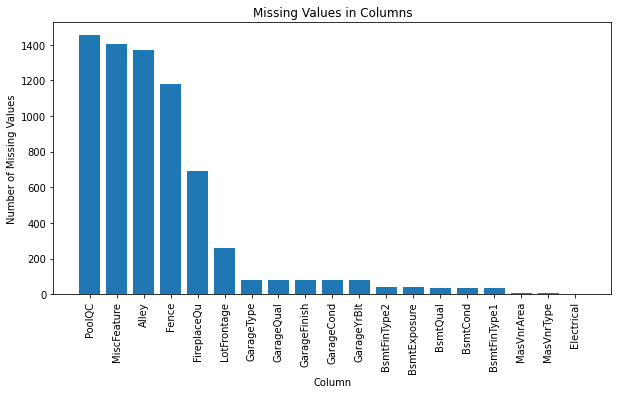

In [9]:
# Create a list of columns with missing values
missing_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 
                   'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 
                   'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 
                   'MasVnrArea', 'MasVnrType', 'Electrical']

# Calculate the number of missing values in each column
missing_values = train[missing_columns].isnull().sum().sort_values(ascending=False)

# Plot the missing values
plt.figure(figsize=(10, 5))
plt.bar(missing_values.index, missing_values.values)
plt.xlabel("Column")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values in Columns")
plt.xticks(rotation=90)
plt.show()



For the missing values, the best options would depend on the column and the specific dataset, taking in count the description in **data_description.txt**:
*     PoolQC: Given that this column refers to the quality of the pool, it would be safe to assume that most houses do not have pools, so we could fill the missing values with "None".
*     MiscFeature: This column refers to other features that do not fall into the other categories, you could fill the missing values with "None".
*     Alley: Given that this column refers to the type of alley access the property has, it is safe to assume that most houses do not have alley access, so we could fill the missing values with "None".
*     Fence: This column refers to the quality of the fence around the property, you could fill the missing values with "None".
*     FireplaceQu: This column refers to the quality of the fireplace in the house, we could fill the missing values with "None".
*     LotFrontage: Given that this column refers to the linear feet of street connected to the property, it would be a good idea to fill the missing values with the median or mean value of the column.
*     GarageYrBlt, GarageCond, GarageType, GarageFinish, GarageQual: Given that these columns refer to different aspects of the garage, if any of the values are missing, it is safe to assume that the property does not have a garage, so we could fill the missing values with "None".
*     BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1: Given that these columns refer to different aspects of the basement, if any of the values are missing, it is safe to assume that the property does not have a basement, so we could fill the missing values with "None".
*     MasVnrArea, MasVnrType: Given that these columns refer to the Masonry veneer area and type, if any of the values are missing, it is safe to assume that the property does not have a masonry veneer, so we could fill the missing values with "None".
*     Electrical: Given that this column refers to the electrical system of the property, it is crucial to fill the missing value with a meaningful value. If possible, we could fill it with the most common value in the column.

In [10]:
#First let's fill data with "None"
fill_none = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
             "GarageCond", "GarageType", "GarageFinish", "GarageQual", "BsmtFinType2",
             "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1", "MasVnrArea", "MasVnrType"]

# fill the train missing values in the specified columns with "None"
train[fill_none] = train[fill_none].fillna("None")
# fill the test missing values in the specified columns with "None"
test[fill_none] = test[fill_none].fillna("None")

train["GarageYrBlt"] = train["GarageYrBlt"].fillna(0)
test["GarageYrBlt"] = test["GarageYrBlt"].fillna(0)

In [11]:
#Now the neccesary data with the mean
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)
# and Electrical with the Mode
train['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)
test['LotFrontage'].fillna(test['LotFrontage'].mean(), inplace=True)
# and Electrical with the Mode
test['Electrical'].fillna(test['Electrical'].mode()[0], inplace=True)


Now we can check if there is another missing value with our function **print_missing_calues()**

In [12]:
print("Train: "+str(print_missing_values(train)))
print("Test: "+str(print_missing_values(test)))

No missing values found in the dataframe.
Train: None
Columns with missing values:
MSZoning        4
BsmtFullBath    2
BsmtHalfBath    2
Functional      2
Utilities       2
Exterior2nd     1
BsmtFinSF2      1
GarageArea      1
BsmtFinSF1      1
GarageCars      1
TotalBsmtSF     1
BsmtUnfSF       1
Exterior1st     1
SaleType        1
KitchenQual     1
dtype: int64
Test: None


In [13]:
# Handle MSZoning column
test['MSZoning'].fillna(test['MSZoning'].mode()[0], inplace=True)
# Handle BsmtFullBath column
test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0], inplace=True)
# Handle BsmtHalfBath column
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0], inplace=True)
# Handle Functional column
test['Functional'].fillna(test['Functional'].mode()[0], inplace=True)
# Handle Utilities column
test['Utilities'].fillna(test['Utilities'].mode()[0], inplace=True)
# Handle Exterior2nd column
test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0], inplace=True)
# Handle BsmtFinSF2 column
test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean(), inplace=True)
# Handle GarageArea column
test['GarageArea'].fillna(test['GarageArea'].mean(), inplace=True)
# Handle BsmtFinSF1 column
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean(), inplace=True)
# Handle GarageCars column
test['GarageCars'].fillna(test['GarageCars'].mean(), inplace=True)
# Handle TotalBsmtSF column
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean(), inplace=True)
# Handle BsmtUnfSF column
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean(), inplace=True)
# Handle Exterior1st column
test['Exterior1st'].fillna(test['Exterior1st'].mode()[0], inplace=True)
# Handle SaleType column
test['SaleType'].fillna(test['SaleType'].mode()[0], inplace=True)
# Handle KitchenQual column
test['KitchenQual'].fillna(test['KitchenQual'].mode()[0], inplace=True)

In [14]:
print("Train: "+str(print_missing_values(train)))
print("Test: "+str(print_missing_values(test)))

No missing values found in the dataframe.
Train: None
No missing values found in the dataframe.
Test: None


We want to check the columns that have the highest percentage of values in just one category or number, and remove them if the percentage is too high

In [15]:
# assume we have a DataFrame named 'train'
threshold = 0.94

# loop over each column in the train dataset
for col in train.columns:
    # count the number of occurrences of each value in the column
    value_counts = train[col].value_counts()
    
    # get the percentage of the most common value
    top_value_percent = value_counts.iloc[0] / len(train)
    
    # if the percentage is above the threshold, remove the column
    if top_value_percent >= threshold:
        print(f"Removing column '{col}' with top value percent of {top_value_percent:.2f}")
        train = train.drop(col, axis=1)
        test = test.drop(col, axis=1)

Removing column 'Street' with top value percent of 1.00
Removing column 'Utilities' with top value percent of 1.00
Removing column 'LandSlope' with top value percent of 0.95
Removing column 'Condition2' with top value percent of 0.99
Removing column 'RoofMatl' with top value percent of 0.98
Removing column 'Heating' with top value percent of 0.98
Removing column 'LowQualFinSF' with top value percent of 0.98
Removing column 'BsmtHalfBath' with top value percent of 0.94
Removing column 'KitchenAbvGr' with top value percent of 0.95
Removing column '3SsnPorch' with top value percent of 0.98
Removing column 'PoolArea' with top value percent of 1.00
Removing column 'PoolQC' with top value percent of 1.00
Removing column 'MiscFeature' with top value percent of 0.96
Removing column 'MiscVal' with top value percent of 0.96


### **SalePrice: is the variable we're going to predict**

Is time to analyze the target variable

In [16]:
pd.DataFrame(train['SalePrice'].describe())

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


Observations
* there is a few variables that seem to not be correlated to our target variable.

c:\Users\Diego\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


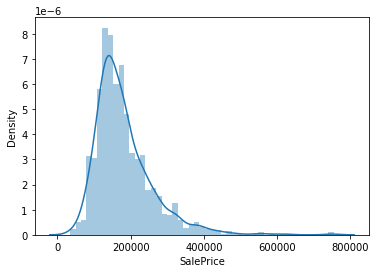

In [17]:
# Plot a barplot of the SalePrice variable to see its distribution
sns.distplot(train['SalePrice'])
plt.show()

We can observe that the distribution of the target variable SalePrice is not normal, it has a positive skew, meaning that the tail on the right side of the distribution is longer or fatter than the left side.

In [18]:
# calculate skewness and kurtosis of SalePrice
print("Skewness: ", stats.skew(train['SalePrice']))
print("Kurtosis: ", stats.kurtosis(train['SalePrice']))

Skewness:  1.880940746034036
Kurtosis:  6.509812011089439


Observation
* The Positive Value of Skewness indicates a positive skew or a longer tail on the right side of the distributions which is correct.
* The positive value of Kurtosis indicates a heavy-tailed distribution, meaning that there are more values in the tails of the distribution tan in a normal distribution
* not normal distribution wee have to change that now

c:\Users\Diego\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice'>

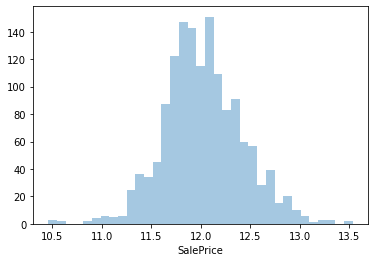

In [19]:
# Log-transform the target variable
train["SalePrice_1"] =train["SalePrice"]#First we are going to copy our data in SalePrice_1 variable
train["SalePrice"] = np.log1p(train["SalePrice"])

# Plot the new distribution of the target variable
sns.distplot(train["SalePrice"], kde=False, hist=True)

In [20]:
# calculate skewness and kurtosis of SalePrice again
print("Skewness: ", stats.skew(train['SalePrice']))
print("Kurtosis: ", stats.kurtosis(train['SalePrice']))

Skewness:  0.12122191311528363
Kurtosis:  0.8026427107468055


Observation
* Now we have a more closer to 0 value it means our transformation worked
* Our Targer variable is normally distributed

### **Outliers + corr**

Now we can to see the correlation of our target variable with the rest of the data using scatterplots and a heatmap

#### **Numerical Variables**

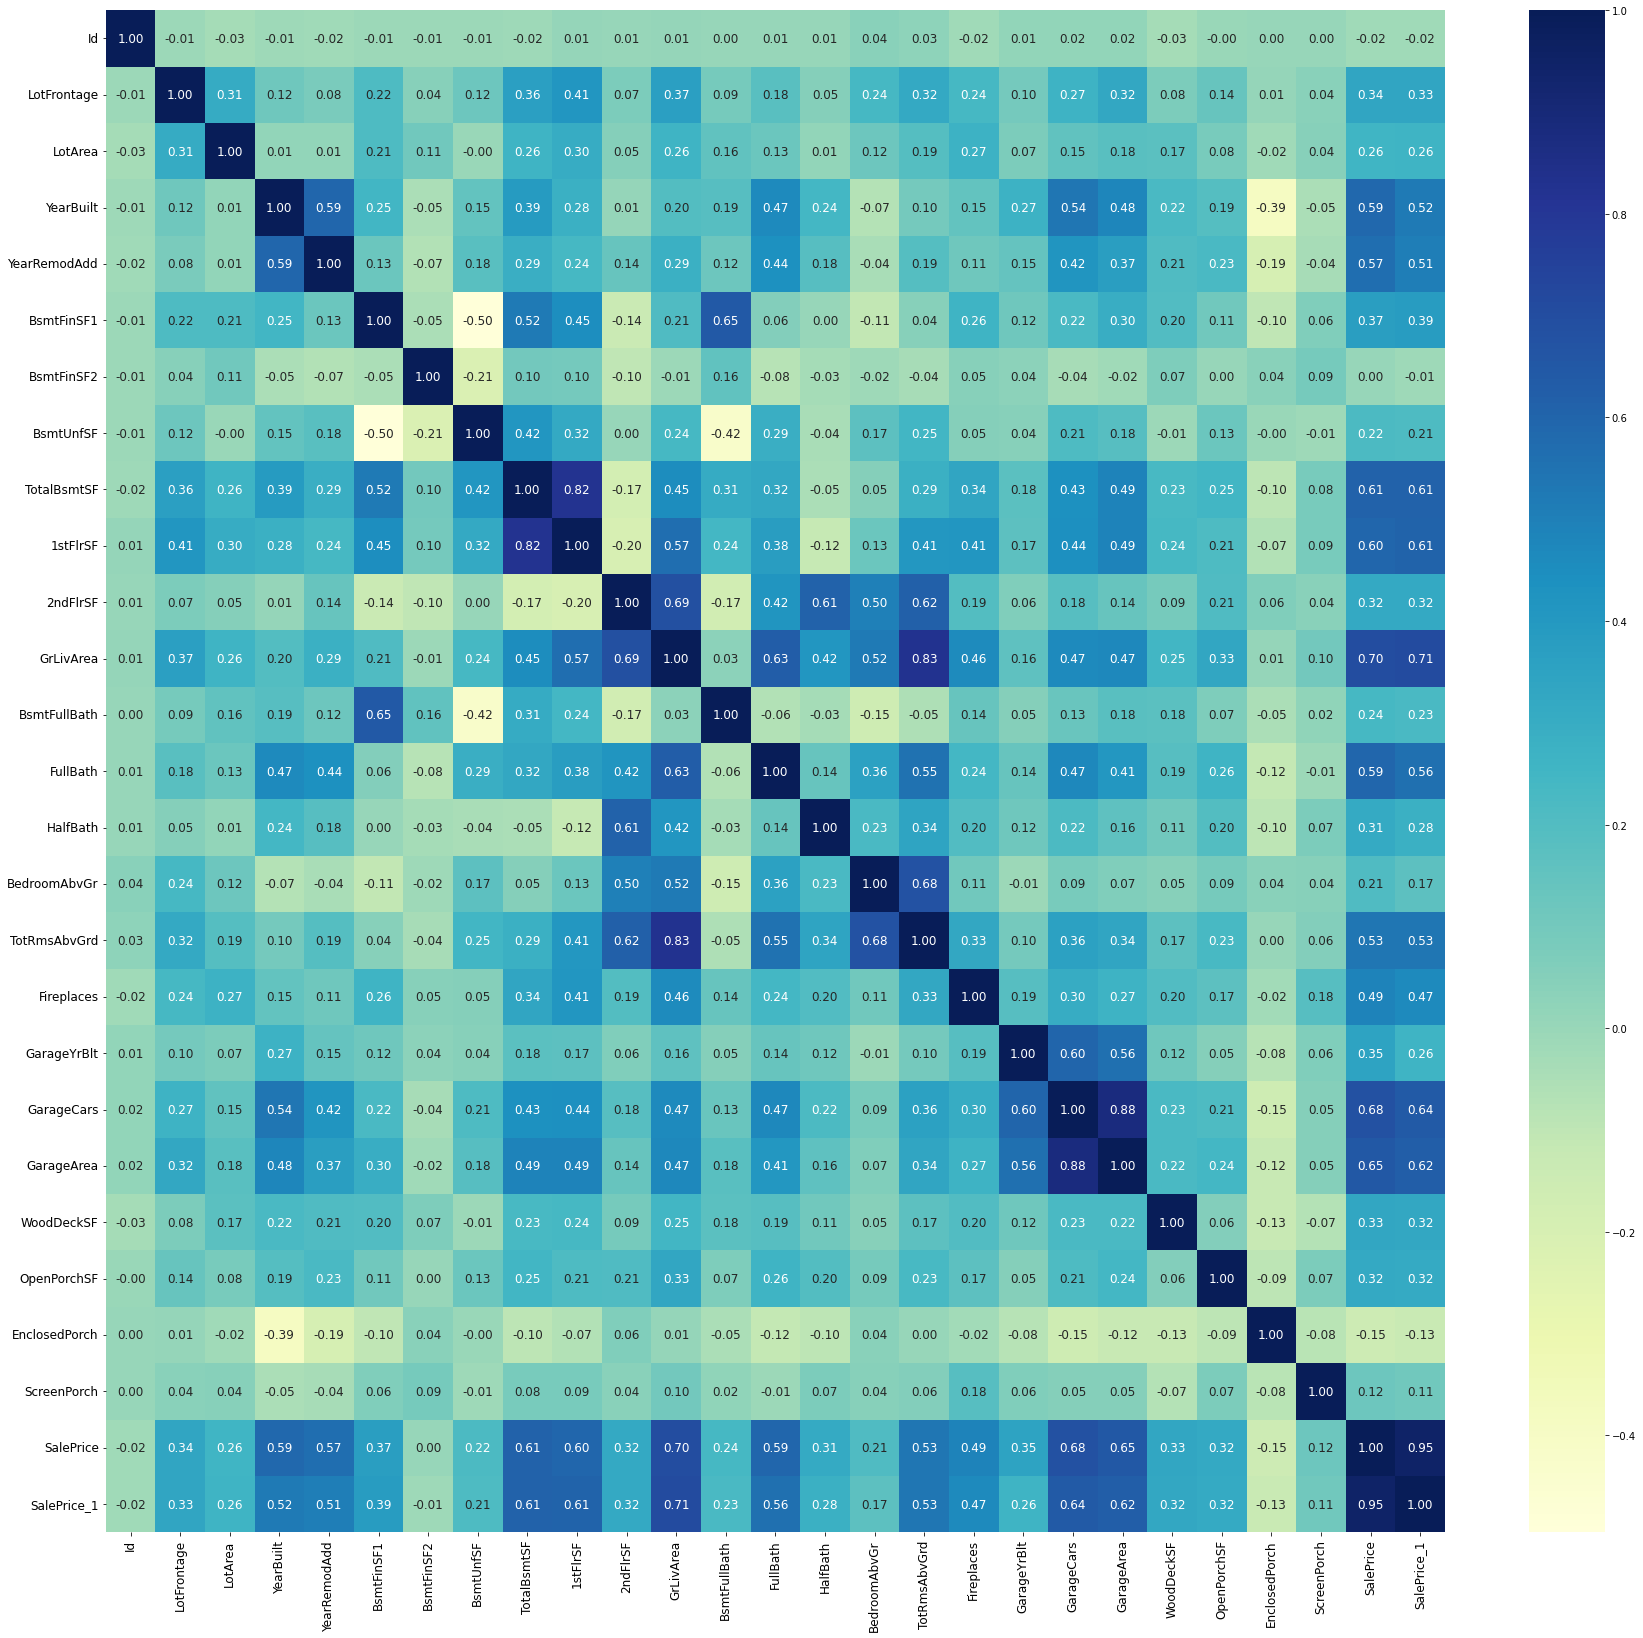

In [21]:
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = train[num_cols].corr()
# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(30, 28))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size": 12})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Variables with high correlation
* **GarageCars** and GarageArea = 0.89 
* **GrLivArea** and TotRmsAbdGrd = 0.83 
* 1stFlrSF & **TotalBsmtSF** = 0.8

We are going to remove:
* TotRmsAbdGrd
* GarageArea
* 1stFlrSF



Variables with high correlation with SalesPrice
* 'YearBuilt', 
* 'YearRemodAdd', 
* 'TotalBsmtSF', 
* 'GrLivArea',
*  'FullBath', 
*  'GarageCars', 

We can have an idea of what variables are influencing more in the SalePrice and the relationship between each other

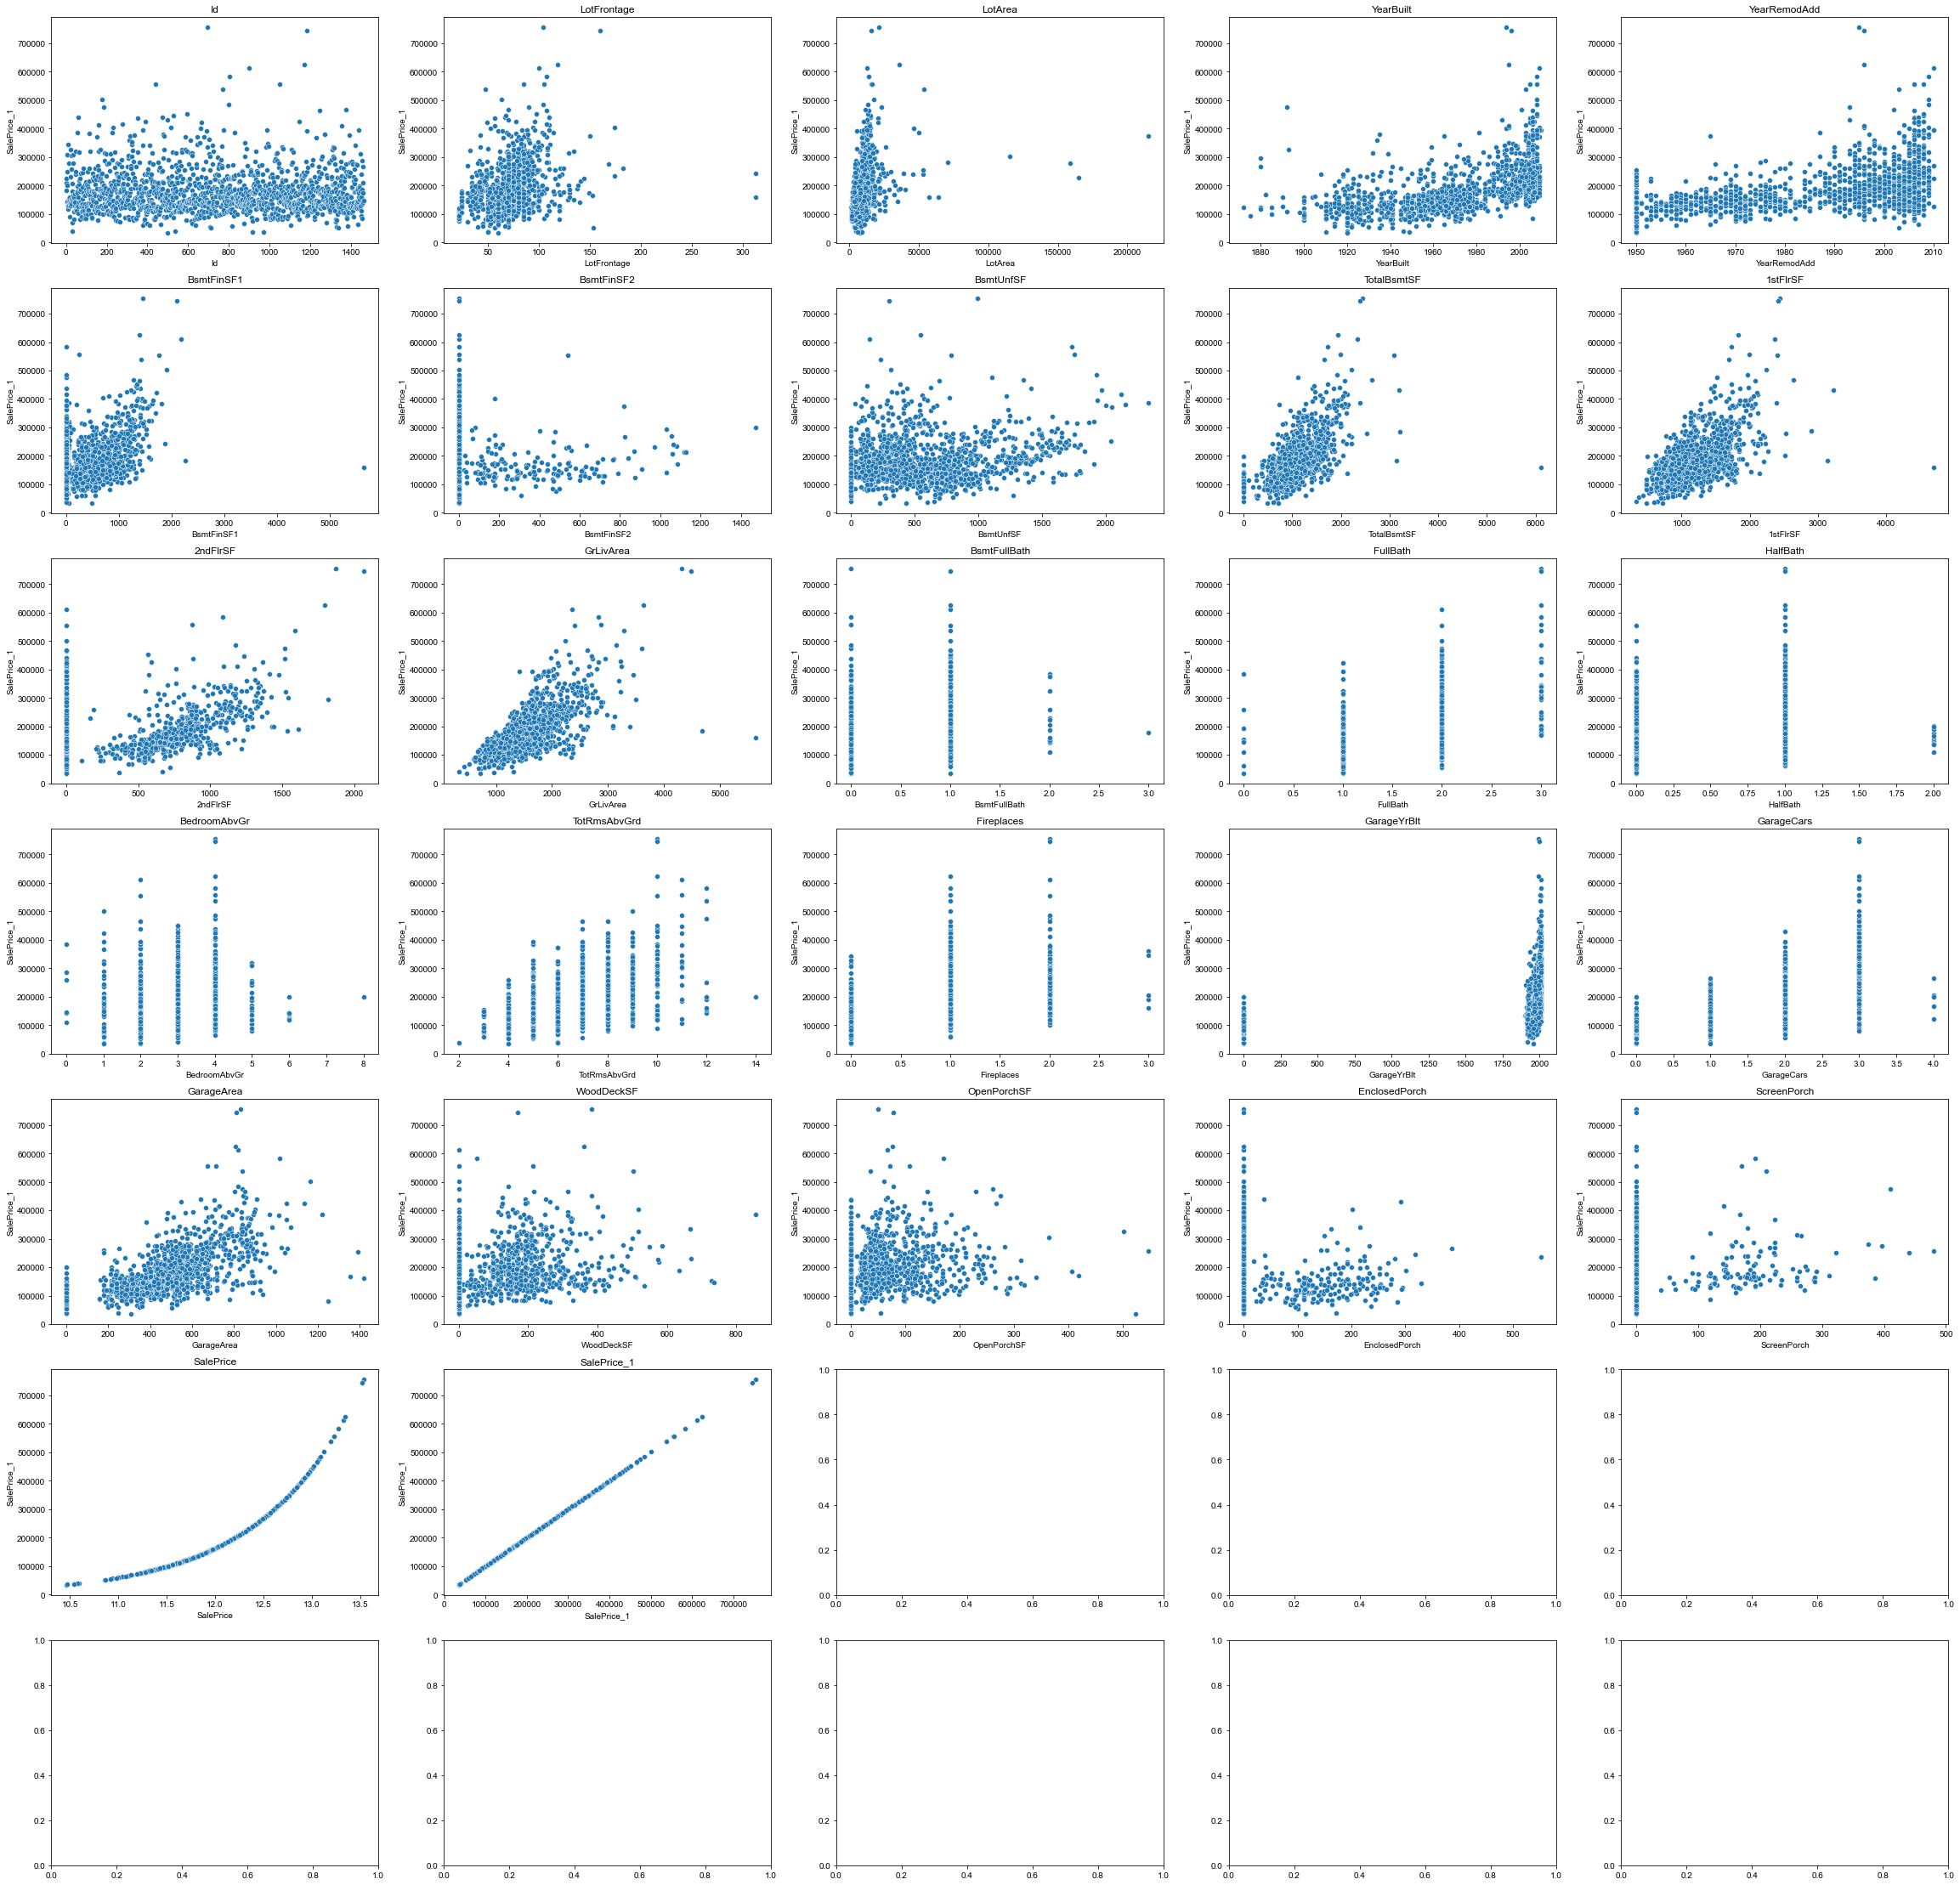

In [22]:


fig, axs = plt.subplots(nrows=7, ncols=5, figsize=(40, 40))
axs = axs.flatten()

# set the seaborn style
sns.set_style("darkgrid")

# loop through the columns and create a scatterplot for each column
for i, col in enumerate(num_cols):
    sns.scatterplot(x=train[col], y=train["SalePrice_1"], ax=axs[i])
    axs[i].set_title(col)

# show the plot
plt.show()

In [23]:
#Letr's try to focus only in the values with more correlation
# Compute correlation coefficients
corr_matrix = train.corr()

# Get the absolute values of the correlation coefficients for the 'SalePrice' column
corr_with_saleprice = abs(corr_matrix['SalePrice'])

# Select only the columns that have correlation coefficient greater than 0.5
relevant_cols = corr_with_saleprice[corr_with_saleprice > 0.5].index

# Extract the relevant columns from the DataFrame
relevant_df = train[relevant_cols]

# Print the relevant columns
print(relevant_df.columns)

Index(['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice',
       'SalePrice_1'],
      dtype='object')


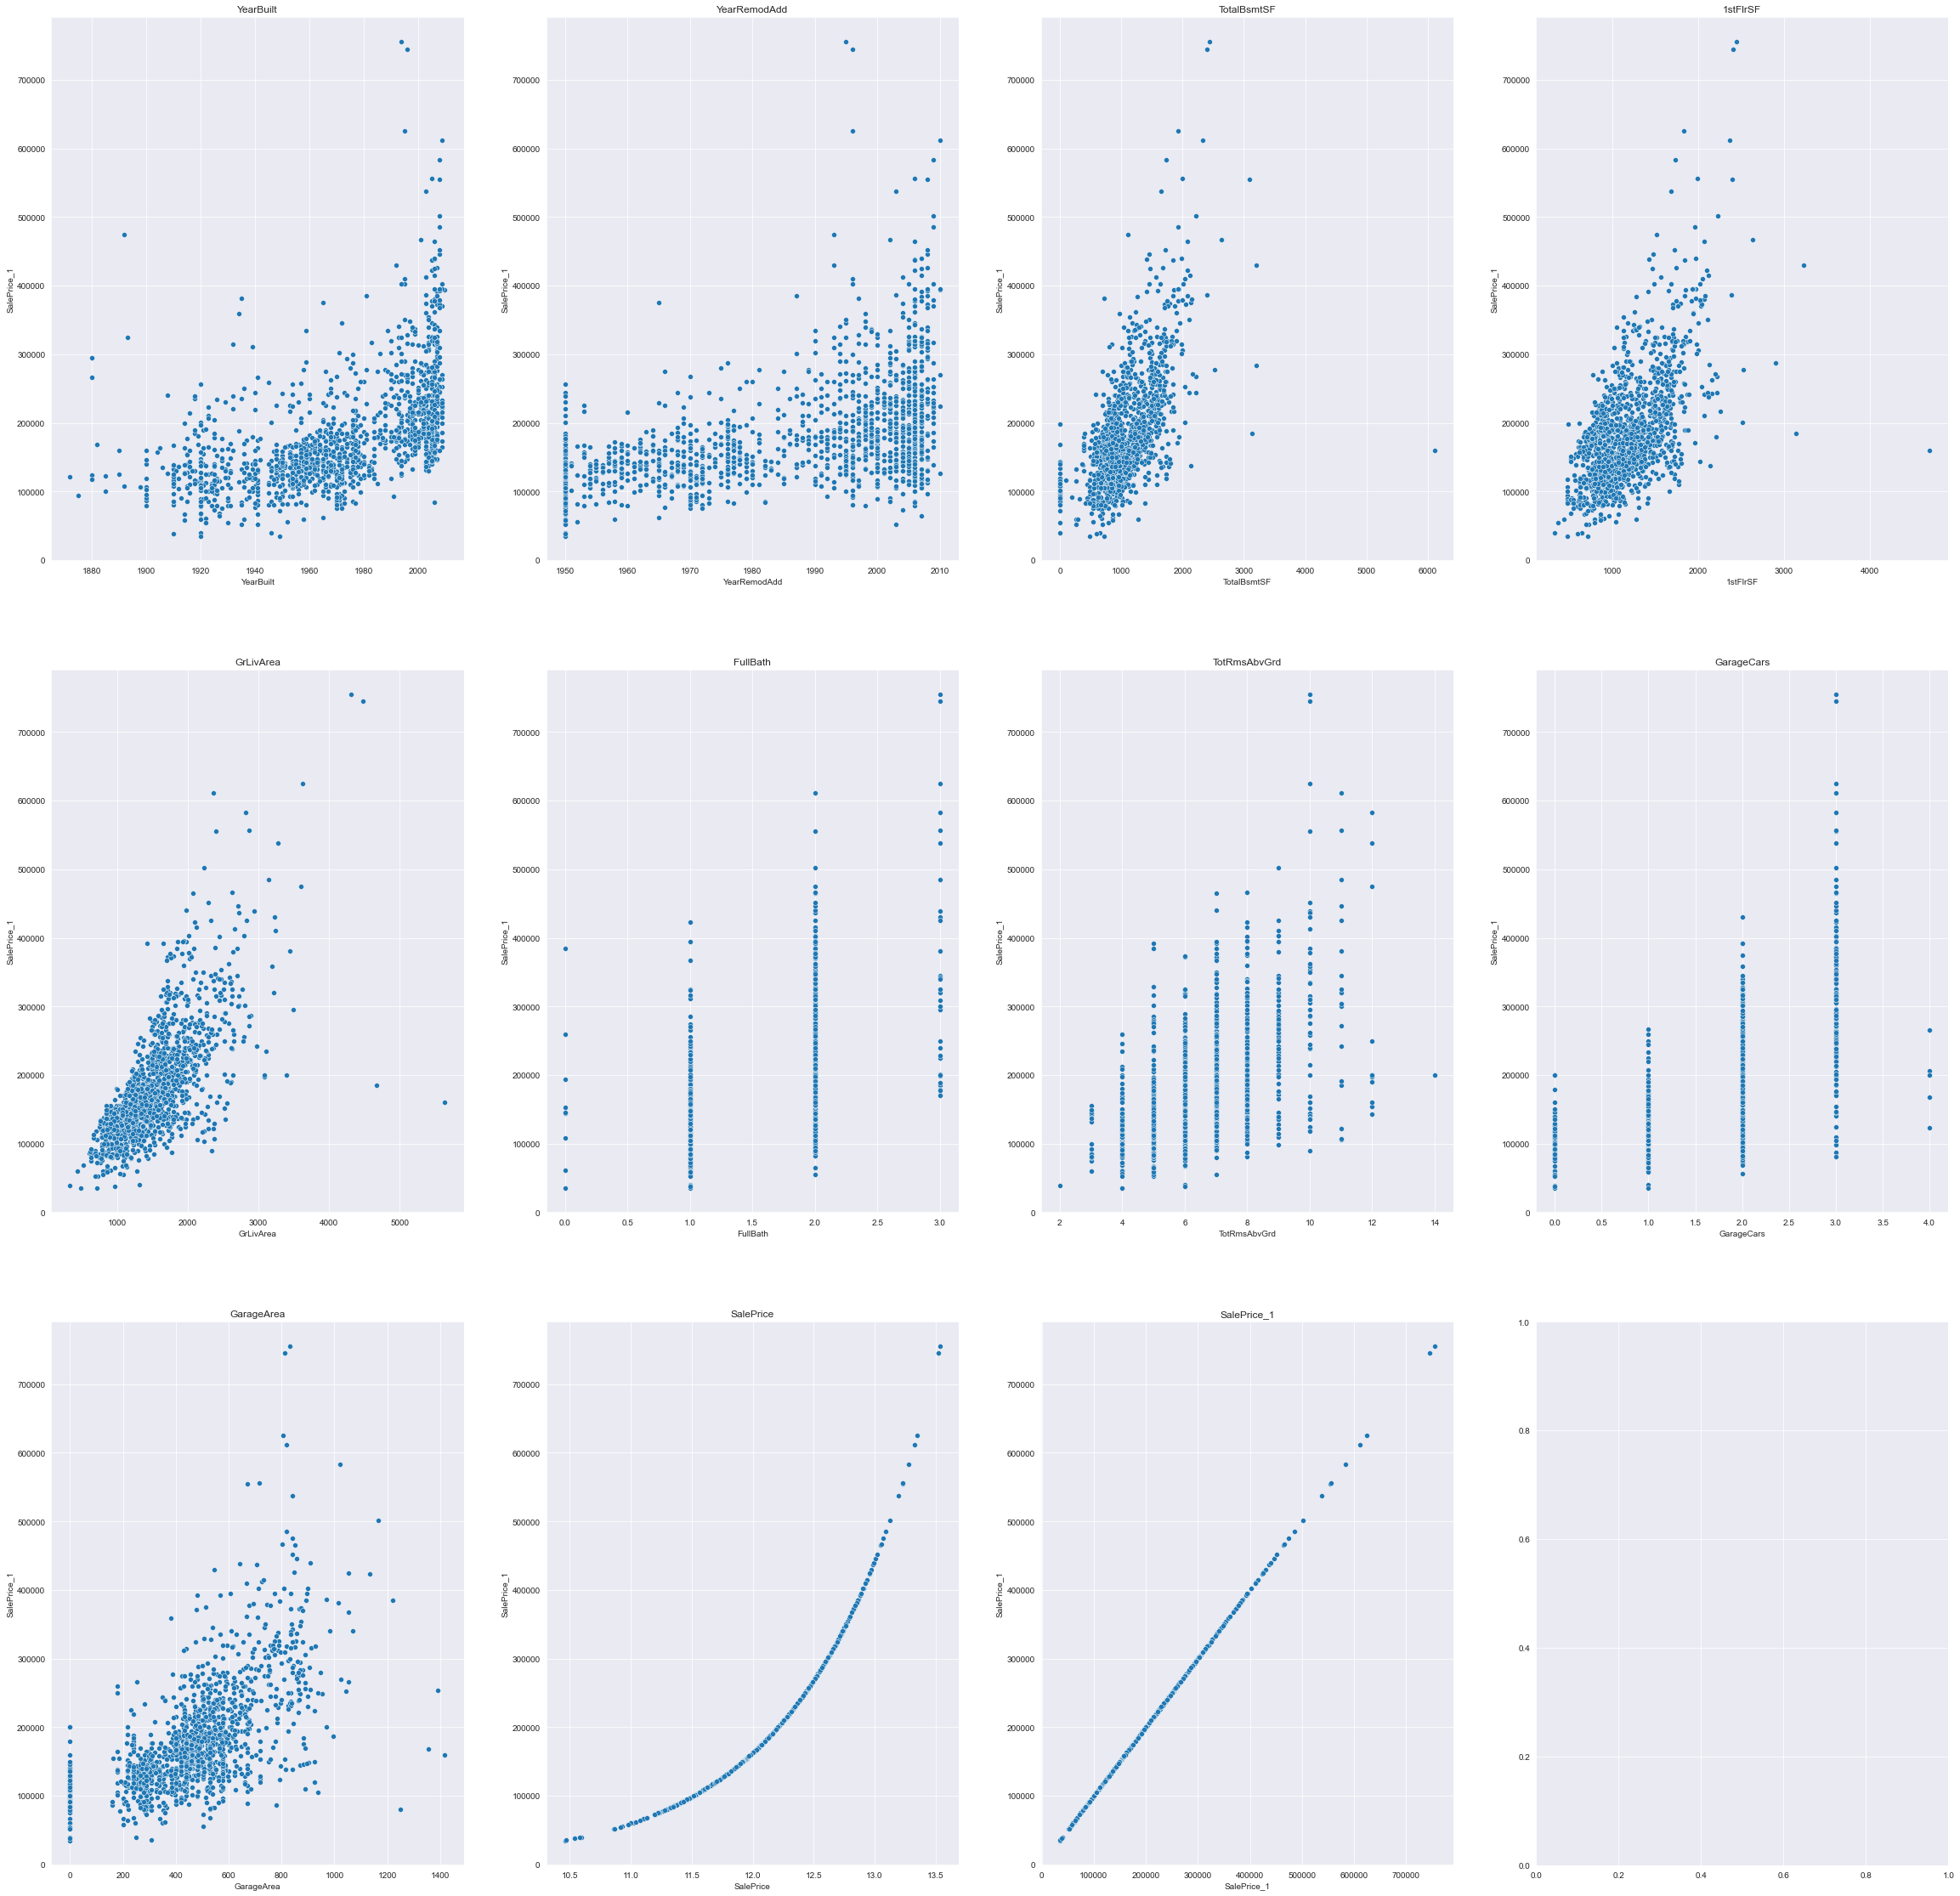

In [24]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(40, 40))
axs = axs.flatten()

# set the seaborn style
sns.set_style("darkgrid")

# loop through the columns and create a scatterplot for each column
for i, col in enumerate(relevant_df):
    sns.scatterplot(x=relevant_df[col], y=relevant_df["SalePrice_1"], ax=axs[i])
    axs[i].set_title(col)

# show the plot
plt.show()

For now Lets handle some visible outliers

**Trimming**: This involves removing extreme values from our data entirely. We can set a threshold for our data and remove any values that fall outside that threshold.

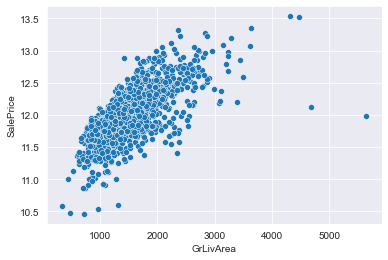

In [25]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.show()

Let's zoom it a bit to discard the correct data

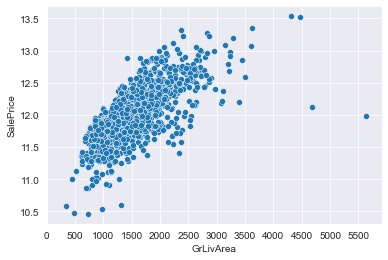

In [26]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.xticks(np.arange(0, train['GrLivArea'].max()+1, 500))

plt.show()

In [27]:
#now we are deleting the data which is higher than 4500 and other columns who has visible or possible outliers
train = train[(train['GrLivArea'] <= 4500)]
train = train[(train['TotRmsAbvGrd'] <= 4500)]
train = train[(train['1stFlrSF'] <= 4000)]

### **Relationship between categorical variables**

We are going to use Cramer's V test as an alternative of Chi_Squared test due to the presence of columns with many dominant categories or values

In [28]:

# define a function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min(kcorr-1, rcorr-1))

# create an empty list to store the results
results = []

# loop over each pair of categorical columns in the train dataset
cat_cols = train.select_dtypes(include=['object']).columns
for i, col1 in enumerate(cat_cols):
    for j, col2 in enumerate(cat_cols):
        if i >= j:
            continue
        # calculate Cramer's V for the pair of columns
        v = cramers_v(train[col1], train[col2])
        # store the results
        results.append((col1, col2, v))

# sort the results by Cramer's V
results.sort(key=lambda x: x[2], reverse=True)

# print the top 10 results
for col1, col2, v in results[:10]:
    print(f"{col1} and {col2} have a Cramer's V of {v:.2f}")

MSSubClass and BldgType have a Cramer's V of 0.89
MSSubClass and HouseStyle have a Cramer's V of 0.85
Exterior1st and Exterior2nd have a Cramer's V of 0.76
MasVnrType and MasVnrArea have a Cramer's V of 0.71
GarageQual and GarageCond have a Cramer's V of 0.70
GarageType and GarageFinish have a Cramer's V of 0.68
MSZoning and Neighborhood have a Cramer's V of 0.64
OverallQual and ExterQual have a Cramer's V of 0.61
GarageFinish and GarageQual have a Cramer's V of 0.59
GarageFinish and GarageCond have a Cramer's V of 0.59


Observations, we are keeping these variables
* MSSubClass has high relationship between more than 2 variables, so we are choosing this variable
* Exterior1st is a good variable
* MasVnrType
* Neighborhood
* Garagefinish

Remove:

* BldgType, HouseStyle Exterior2nd, MasvnrArea, GarageCond, GarageType, GarageQual,MSZoning


Now with the sum of cat+Numerical variables we have:
* YearBuilt
* YearRemodAdd
* TotalBsmtSF
* GrLivArea
* FullBath
* GarageCars
* MSSubClass 
* Exterior1st 
* MasVnrType
* Neighborhood
* Garagefinish


**Removing variables from test and train datasets**

In [29]:
remove_vars = ['GarageArea', 'TotRmsAbvGrd', 'TotRmsAbvGrd', 'BldgType', 'HouseStyle', 'Exterior2nd', 'MasVnrArea', 'GarageCond', 'GarageType', 'GarageQual', 'MSZoning']

# drop the variables from the train and test datasets
train = train.drop(remove_vars, axis=1)
train= train.drop('SalePrice_1',axis=1)
test = test.drop(remove_vars, axis=1)

In [30]:
test.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'Fence', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [31]:
train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'Fence', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

## Prepare the data for modeling + Build and evaluate models

In [49]:


# Define target variable
target = 'SalePrice'

# Define predictors
predictors = [col for col in train.columns if col != target and col != 'Id']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train[predictors], train[target], test_size=0.2, random_state=0)

# Define pre-processing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, X_train.select_dtypes(include=[np.number]).columns),
    ('cat', categorical_transformer, X_train.select_dtypes(include=['object']).columns)
])

# Define feature selection pipeline
selector = SelectKBest(score_func=f_regression, k=60)

# Define machine learning models
models = [('Linear Regression', LinearRegression()),
          ('Lasso', Lasso(alpha=0.001, random_state=42)),
          ('Ridge', Ridge(alpha=0.1, random_state=42)),
          ('Random Forest Regressor', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)),
          ('Gradient Boosting Regressor', GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, loss='huber', random_state=42))]

# Define full pipelines
pipelines = []
for model in models:
    pipelines.append(Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('selector', selector),
        ('model', model[1])
    ]))

# Fit and evaluate pipelines
results = []
for pipeline, model in zip(pipelines, models):
    # Fit pipeline to training data
    pipeline.fit(X_train, y_train)
    
    

    # Predict on validation data
    
    y_pred_val = pipeline.predict(X_val)
    
    
    

    # Calculate RMSE on validation data
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
    
    
    #accuracy_val = pipeline.score(X_val, y_pred_val)
    accuracy_val = pipeline.score(X_val, y_val)
    # Predict on test data
    test_2 = test.drop(['Id'], axis=1)
    y_pred_test = pipeline.predict(test_2)
    
    # Save test predictions to file
    output = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred_test})
    output.to_csv(f'submission_{model[0]}.csv', index=False)

    # Calculate accuracy on test data
    y_test = pd.read_csv(f'submission_{model[0]}.csv')['SalePrice']
    #accuracy_test = pipeline.score(test_2, y_test)
    #accuracy_test = pipeline.score(test_2, y_test)
    

    # Store results
    results.append((model[0], rmse_val,accuracy_val))

# Print results
print('{:<30s} {:<20s} {:<20s} '.format('Model', 'Validation RMSE', 'Val acc'))
print('-' * 70)
for result in results:
    print('{:<30s} {:<20f} {:<20f} '.format(result[0], result[1], result[2]))

Model                          Validation RMSE      Val acc              
----------------------------------------------------------------------
Linear Regression              0.127374             0.904266             
Lasso                          0.126428             0.905684             
Ridge                          0.126691             0.905290             
Random Forest Regressor        0.127395             0.904235             
Gradient Boosting Regressor    0.123405             0.910140             


Observations:
We tried different models and obtained a good acc but it can be better

Best acc:
* Gradient Boosting Regressor , 91,01%


### **Improving Hyperparameters**

#### RandomForestRegressor

In [50]:

# Define hyperparameters to search
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Create a random forest regressor pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('model', RandomForestRegressor(random_state=42))
])

# Create a GridSearchCV object
rf_grid = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error')

# Fit the GridSearchCV object to the training data
rf_grid.fit(X_train, y_train)

# Get the best estimator from the GridSearchCV object
best_rf_pipeline = rf_grid.best_estimator_

# Evaluate the best estimator on the validation data
y_pred_val = best_rf_pipeline.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
accuracy_val = best_rf_pipeline.score(X_val, y_val)

# Predict on test data
test_2 = test.drop(['Id'], axis=1)
y_pred_test = best_rf_pipeline.predict(test_2)
# Print results
print('{:<30s} {:<20s} {:<20s} '.format('Model', 'Validation RMSE', 'Val acc'))
print('-' * 70)
print('{:<30s} {:<20f} {:<20f} '.format('RandomForestRegressor', rmse_val, accuracy_val))
# Save test predictions to file
#print results

Model                          Validation RMSE      Val acc              
----------------------------------------------------------------------
RandomForestRegressor          0.128234             0.902970             


### GradientBoostingRegressor

In [52]:
# Define hyperparameters to search
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 1],
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Create a Gradient Boosting Regressor pipeline
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Create a GridSearchCV object
gb_grid = GridSearchCV(estimator=gb_pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error')

# Fit the GridSearchCV object to the training data
gb_grid.fit(X_train, y_train)

# Get the best estimator from the GridSearchCV object
best_gb_pipeline = gb_grid.best_estimator_

# Evaluate the best estimator on the validation data
y_pred_val = best_gb_pipeline.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
accuracy_val = best_gb_pipeline.score(X_val, y_val)

# Predict on test data
test_2 = test.drop(['Id'], axis=1)
y_pred_test = best_gb_pipeline.predict(test_2)

# Save test predictions to file
output = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred_test})
output.to_csv('submission_gb.csv', index=False)

# Print results
print('{:<30s} {:<20s} {:<20s} '.format('Model', 'Validation RMSE', 'Val acc'))
print('-' * 70)
print('{:<30s} {:<20f} {:<20f} '.format('Gradient Boosting Regressor', rmse_val, accuracy_val))

Model                          Validation RMSE      Val acc              
----------------------------------------------------------------------
Gradient Boosting Regressor    0.121529             0.912852             


### Support Vector Regression (SVR)

In [51]:

# Define hyperparameters to search
param_grid = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'model__gamma': ['scale', 'auto']
}

# Create an SVR pipeline
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('model', SVR())
])

# Create a GridSearchCV object
svr_grid = GridSearchCV(estimator=svr_pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error')

# Fit the GridSearchCV object to the training data
svr_grid.fit(X_train, y_train)

# Get the best estimator from the GridSearchCV object
best_svr_pipeline = svr_grid.best_estimator_

# Evaluate the best estimator on the validation data
y_pred_val = best_svr_pipeline.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
accuracy_val = best_svr_pipeline.score(X_val, y_val)

# Predict on test data
test_2 = test.drop(['Id'], axis=1)
y_pred_test = best_svr_pipeline.predict(test_2)

# Save test predictions to file

# Print results
print(f"RMSE on validation data: {rmse_val}")
print(f"Accuracy on validation data: {accuracy_val}")

RMSE on validation data: 0.12677680805544847
Accuracy on validation data: 0.9051623959532866
